In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
N_SAMPLES = 10
MIN_ID = 600
MAX_ID = 700

# generate random image ids
samples = np.random.randint(MIN_ID, MAX_ID, N_SAMPLES)

lr_paths = [f'./data/Flickr2K/Flickr2K_LR_bicubic/X2/{sample:06d}x2.png' for sample in samples]
hr_paths = [
    f'./data/Flickr2K/Flickr2K_HR/{sample:06d}.png' for sample in samples
]


test_dir = './test'
X_dir = os.path.join(test_dir, 'X')
Y_pred_dir = os.path.join(test_dir, 'Y_pred')
Y_true_dir = os.path.join(test_dir, 'Y_true')

if not os.path.exists(test_dir):
    os.makedirs(test_dir)


os.system(f'rm -rf {test_dir}/*')
os.makedirs(X_dir)
os.makedirs(Y_pred_dir)
os.makedirs(Y_true_dir)


for i, lr_path in enumerate(lr_paths):
    prefix = os.path.basename(lr_path)
    prefix = os.path.splitext(prefix)[0]
    prefix = prefix.replace('x2', '')
    os.system(f'cp {lr_path} {X_dir}/{prefix}.png')

for i, hr_path in enumerate(hr_paths):
    os.system(f'cp {hr_path} {Y_true_dir}')

In [26]:
os.system(f'python3 xlss.py ./test/X ./test/Y_pred')

I0000 00:00:1714625969.421405   41860 service.cc:145] XLA service 0x77b5c8003870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714625969.421450   41860 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
I0000 00:00:1714625971.472479   41860 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step
Done!


0

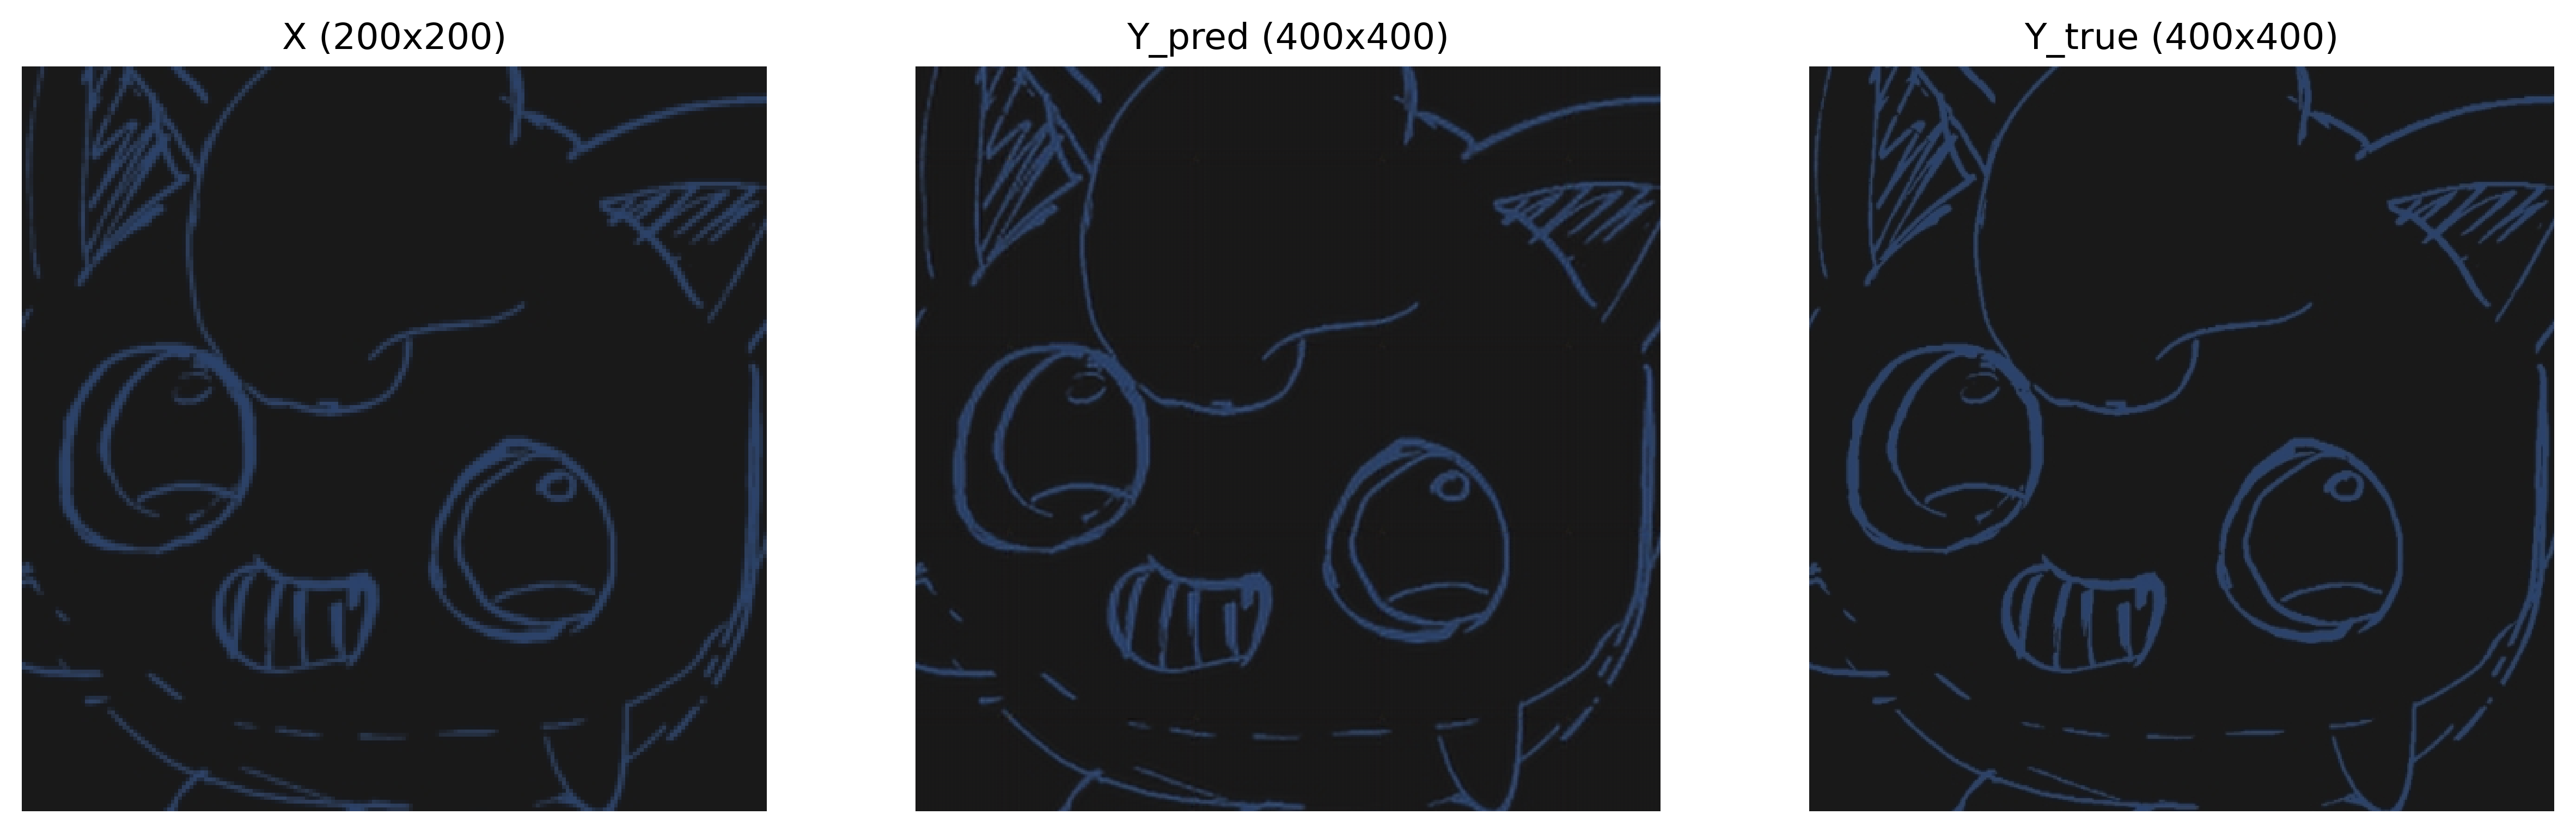

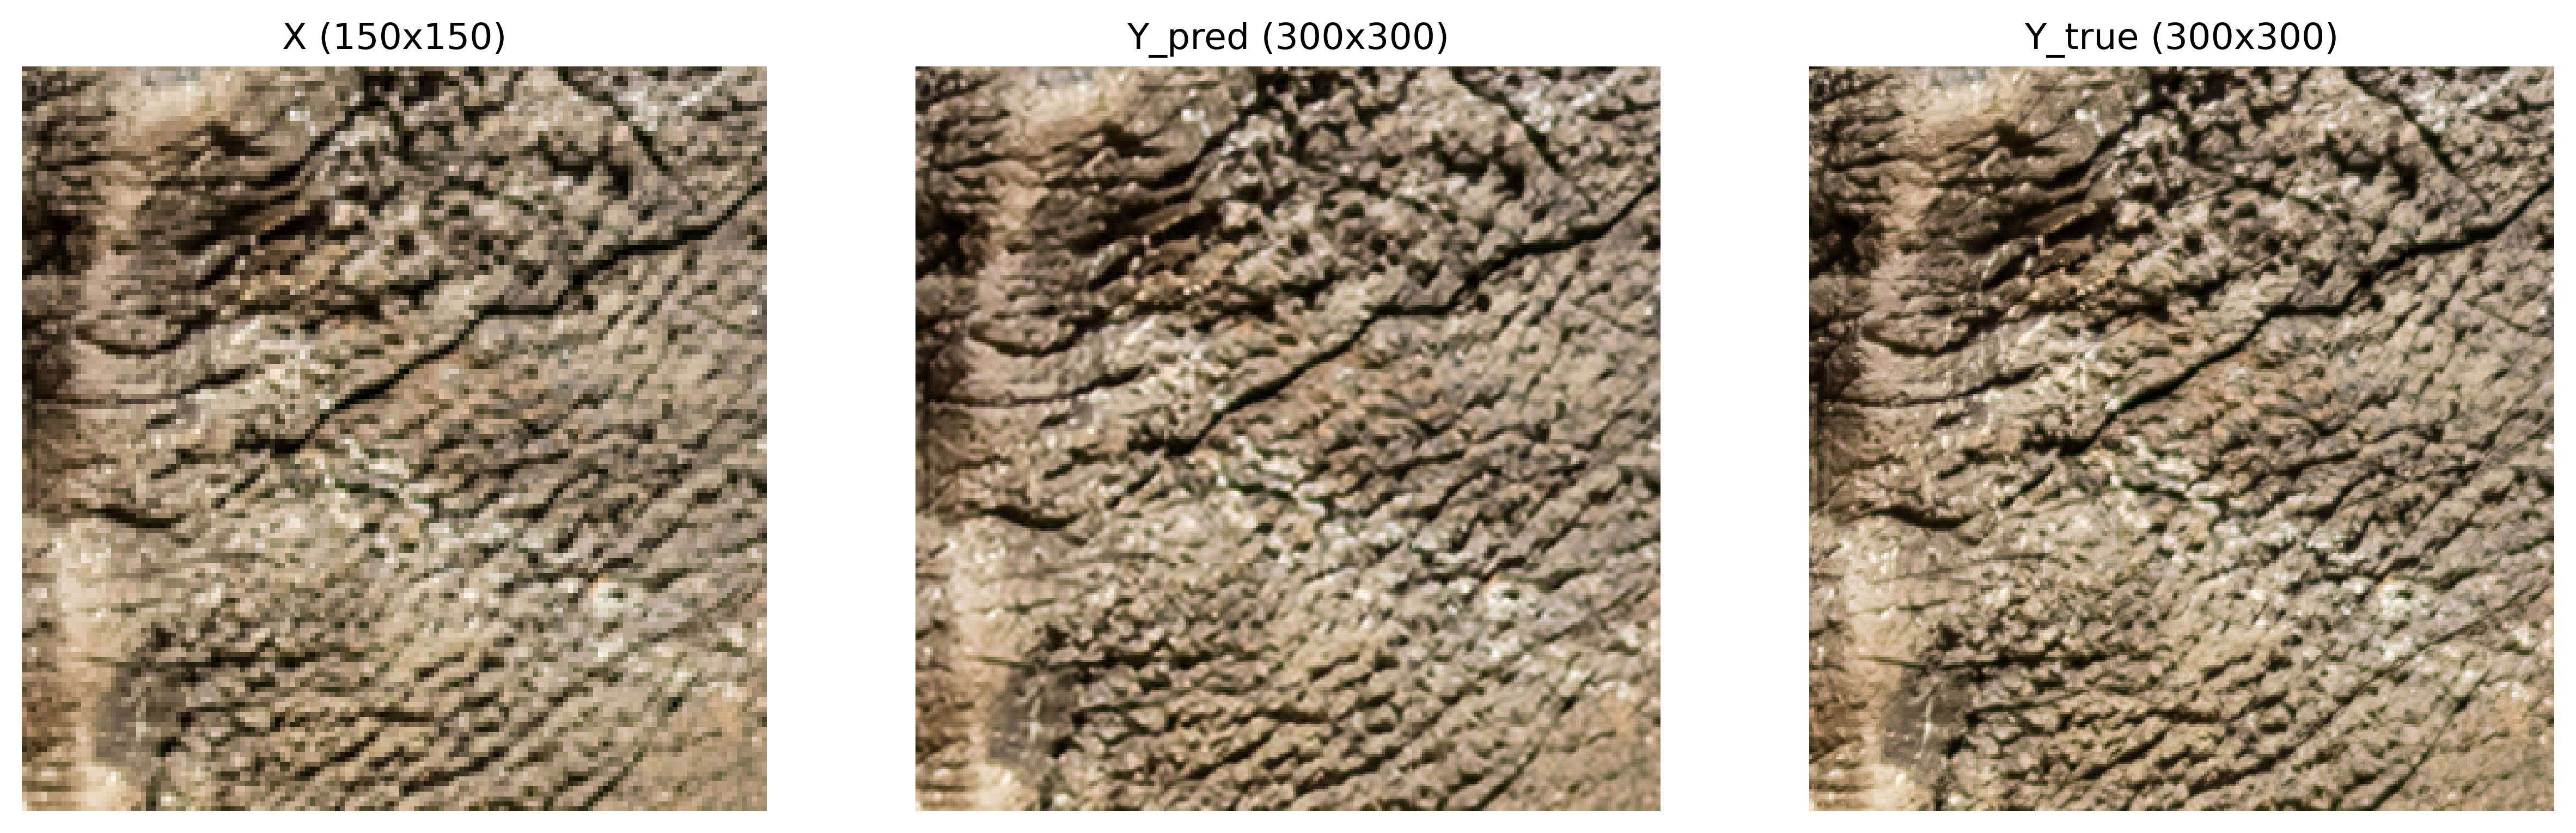

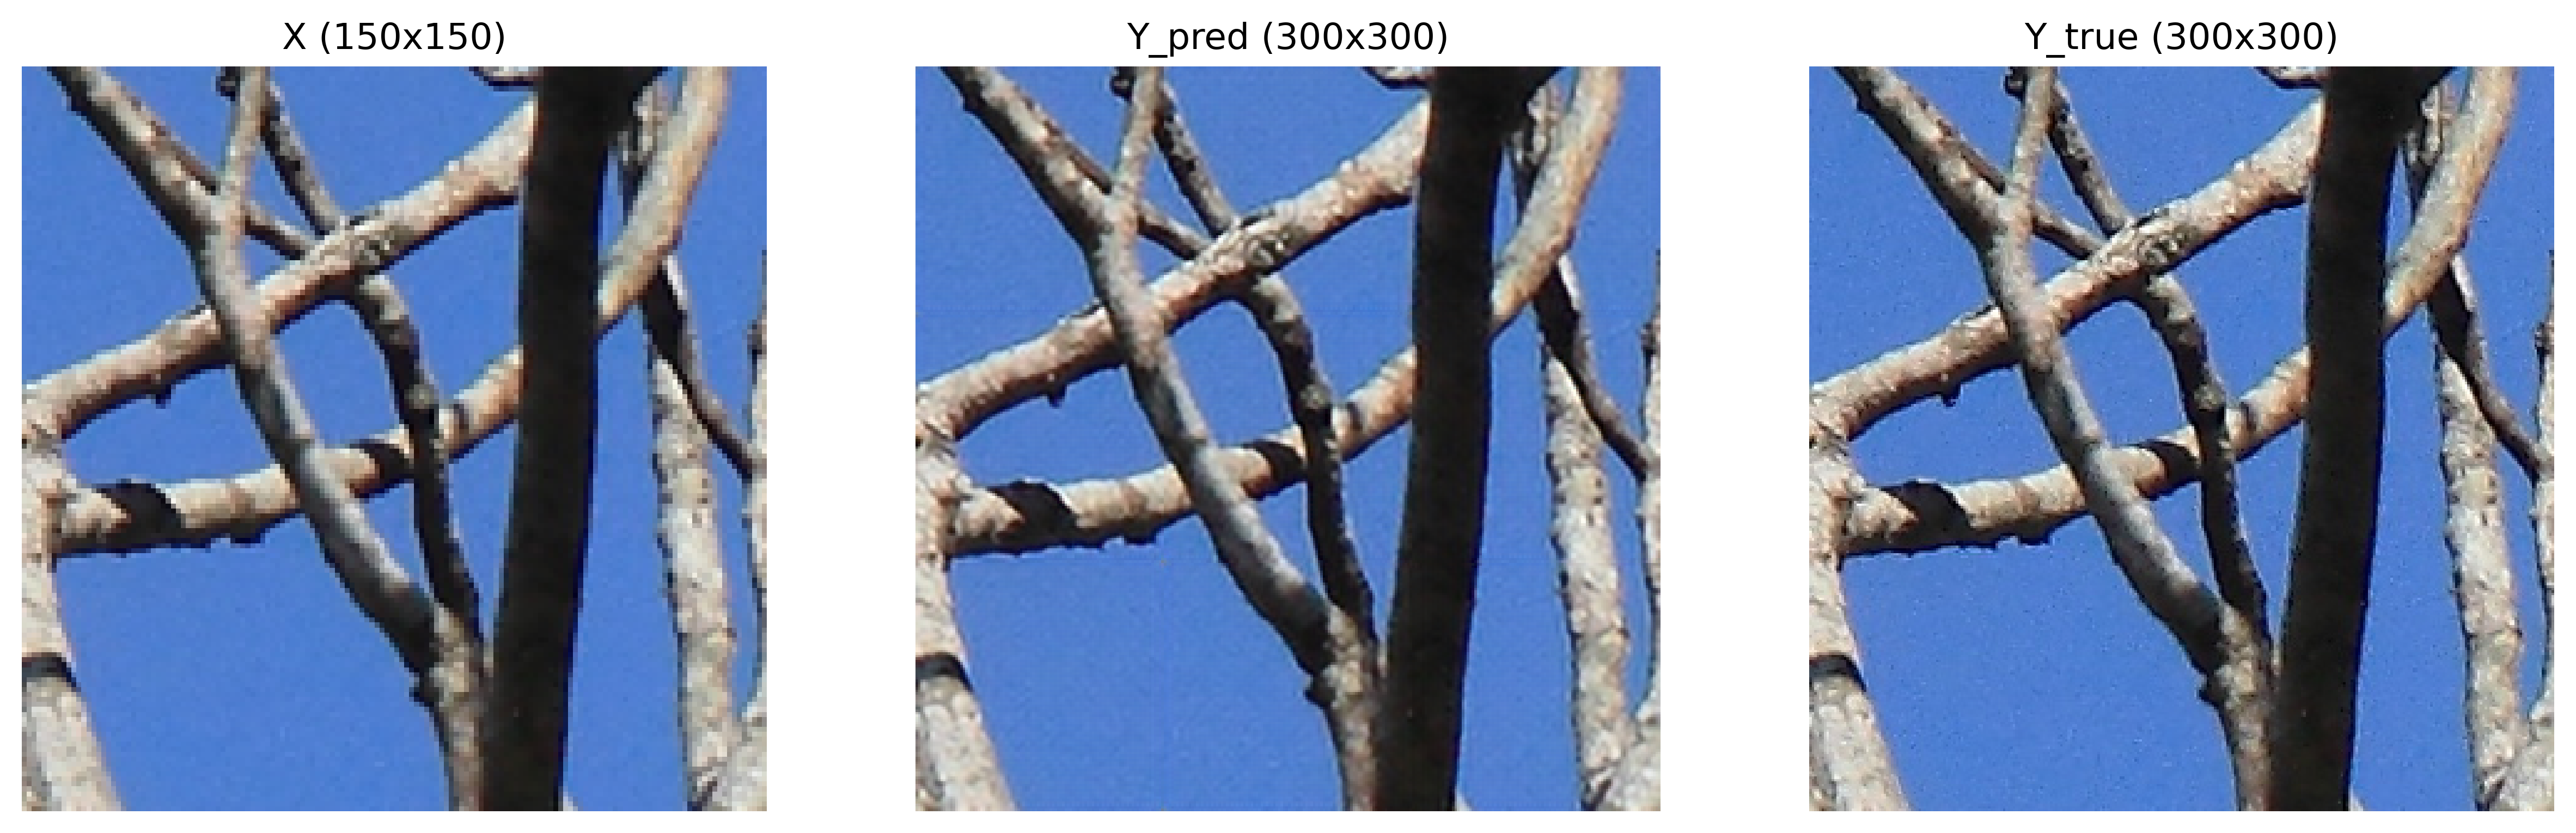

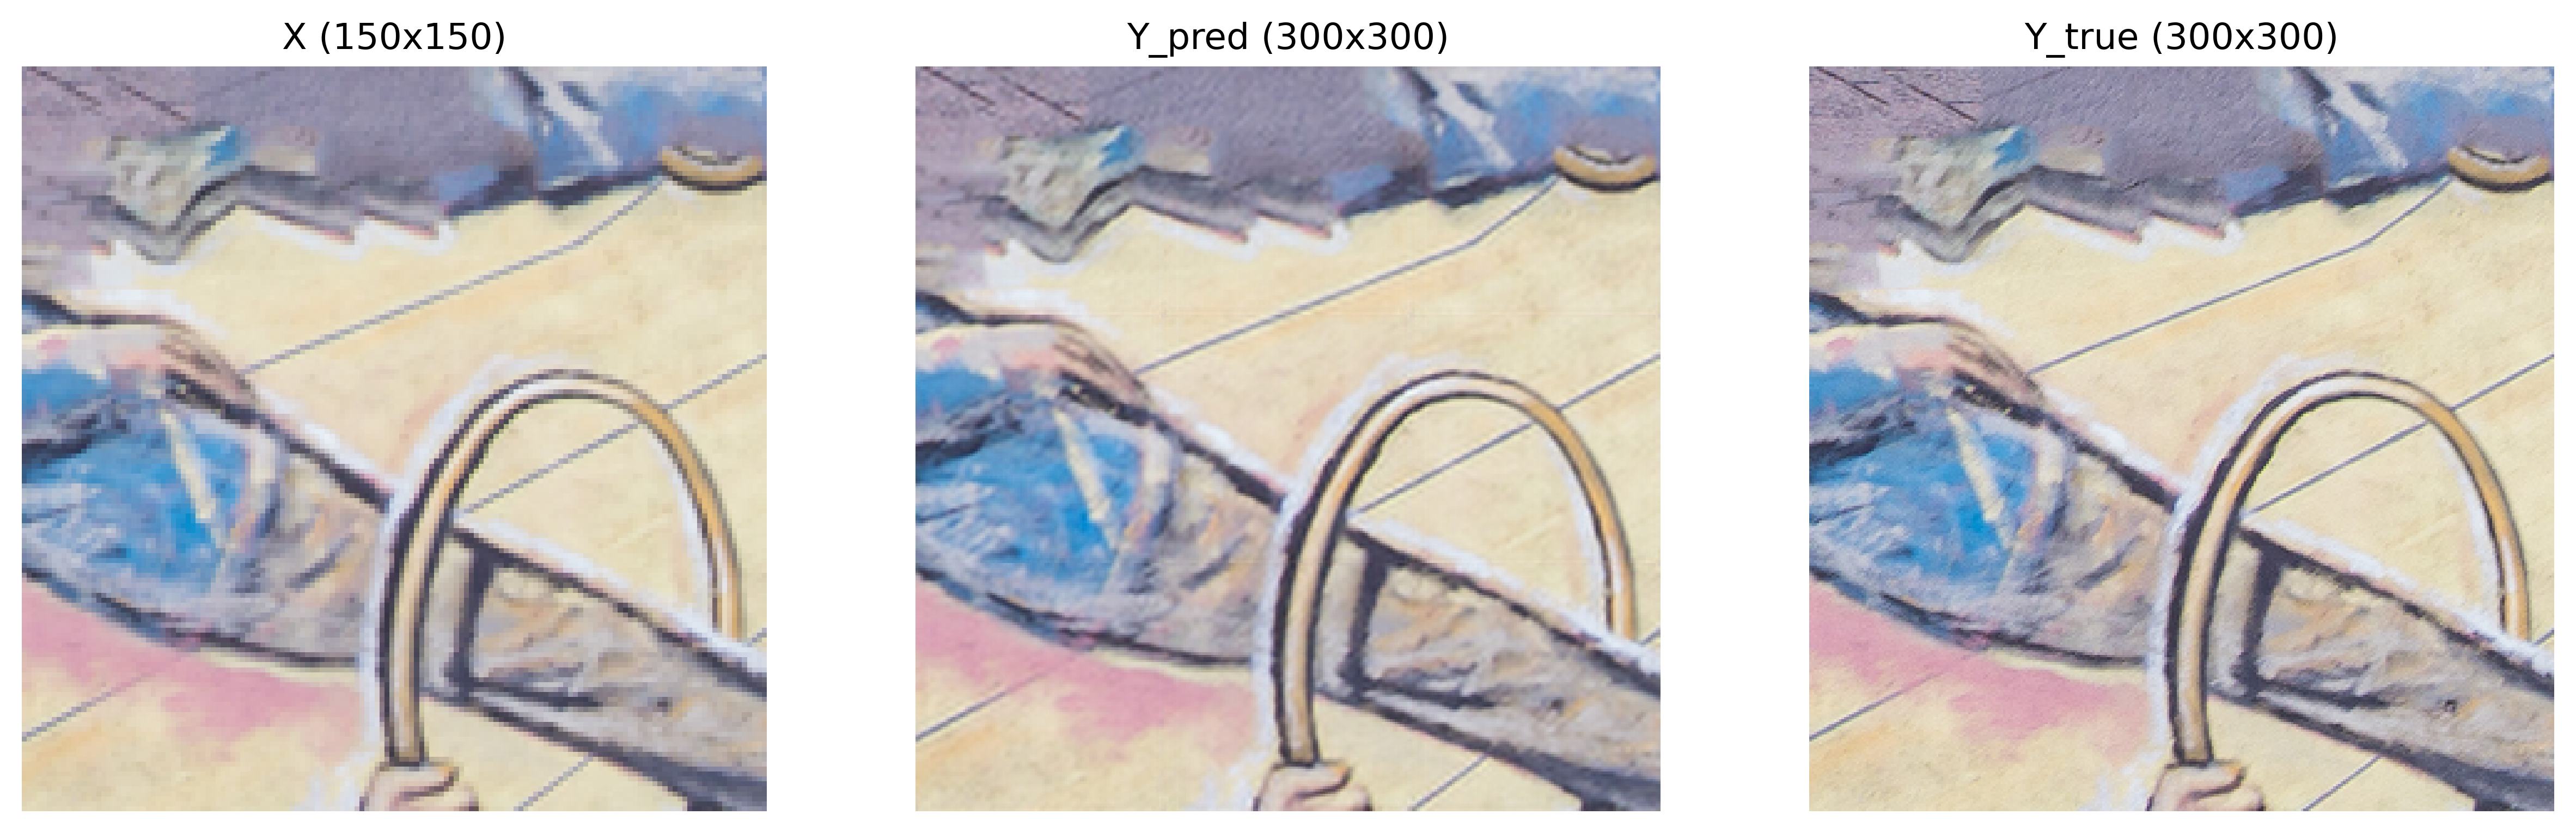

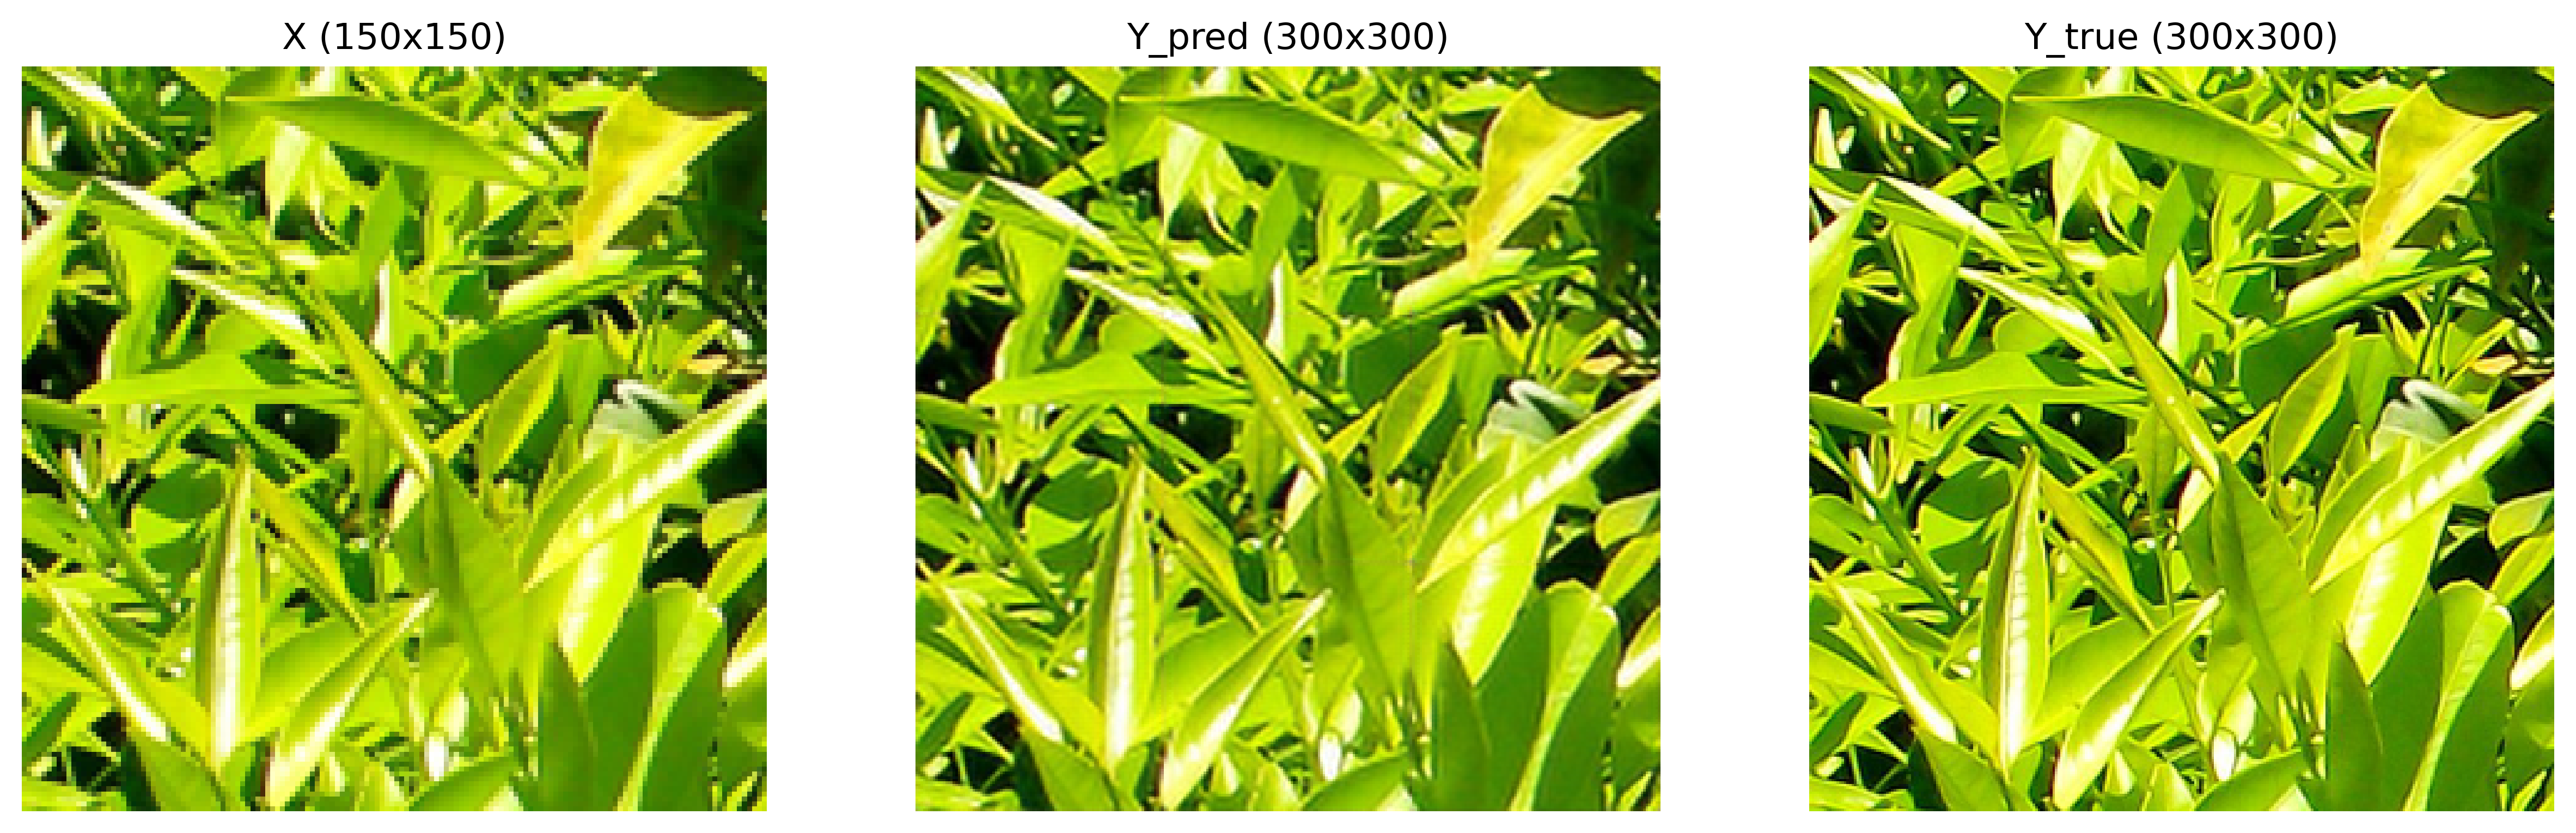

In [27]:
def display_images(p, display_dim=300, x0=0, y0=0):
    """
    SHOW UPPER-LEFT CORNER OF THE HR IMAGE
    """

    plt.figure(figsize=(15, 10), dpi=400)
    lr_img = plt.imread(f'{X_dir}/{p}')
    hr_img = plt.imread(f'{Y_true_dir}/{p}')
    pred_img = plt.imread(f'{Y_pred_dir}/{p}')

    lr_img = lr_img[y0 // 2:y0 // 2 + display_dim // 2,
                    x0 // 2:x0 // 2 + display_dim // 2, :]
    hr_img = hr_img[y0:y0 + display_dim, x0:x0 + display_dim, :]
    pred_img = pred_img[y0:y0 + display_dim, x0:x0 + display_dim, :]

    plt.subplot(1, 3, 1)
    plt.imshow(lr_img)
    plt.title('X' + f' ({display_dim//2}x{display_dim//2})')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(pred_img)
    plt.title('Y_pred' + f' ({display_dim}x{display_dim})')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(hr_img)
    plt.title('Y_true' + f' ({display_dim}x{display_dim})')
    plt.axis('off')

    plt.savefig(f'./test/{p}', dpi=400, bbox_inches='tight')

display_images('1.png', 400, 50, 50)

for i, hr_path in enumerate(hr_paths):
    if i in [2,3,4,5]:
        prefix = os.path.basename(hr_path)
        display_images(prefix, 300)